# Importing Packages

In [48]:
#Modules for data loading
import numpy as np
import pandas as pd

#Modules for visualizing dataset
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

#Modules for preprocessing and hyperparameter tuning
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Modules for machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#Modules for evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#Misc.
import time

# Loading Dataset

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Basic Statistics

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
dfi.export(df.head(), 'table.png')

In [21]:
print("Columns::", df.columns.tolist())

Columns:: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
dfi.export(df.describe(), 'describe.png')
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [24]:
#Checking out the categories and their respective counts in each feature
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

In [3]:
df.drop('default', axis=1, inplace=True)
df.drop('duration', axis=1, inplace=True)

In [4]:
df = df.replace('unknown', np.NaN)

In [5]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

# EDA and Preprocessing

## Count plot for Age feature

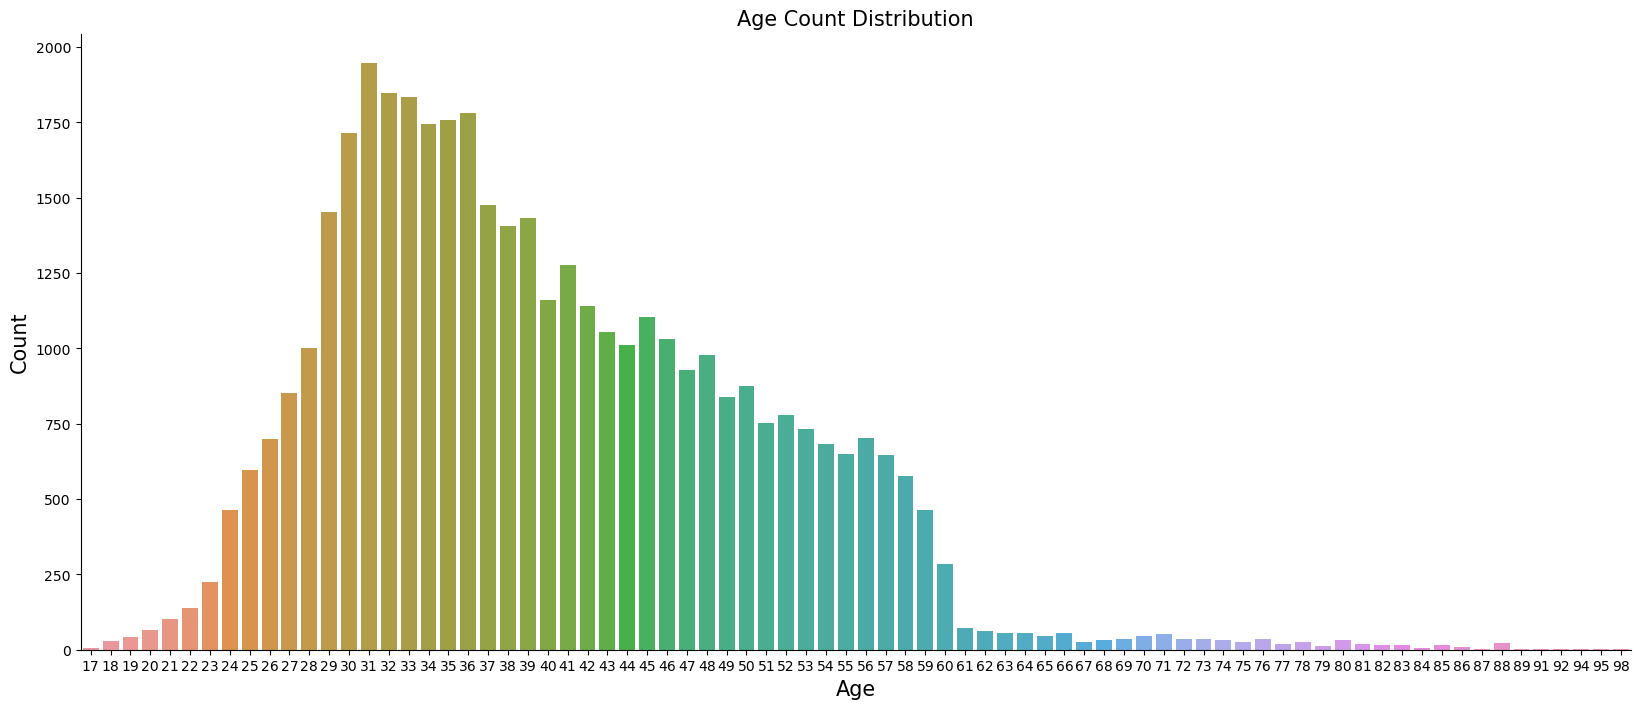

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [6]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [7]:
# Create new column 'not_prev_contacted'
df["not_prev_contacted"] = df['pdays'].map(lambda x: x == 999)*1

# Replace `999` with 0s in `pdays` column
df.loc[df['pdays'] == 999, "pdays"] = 0

## Histograms

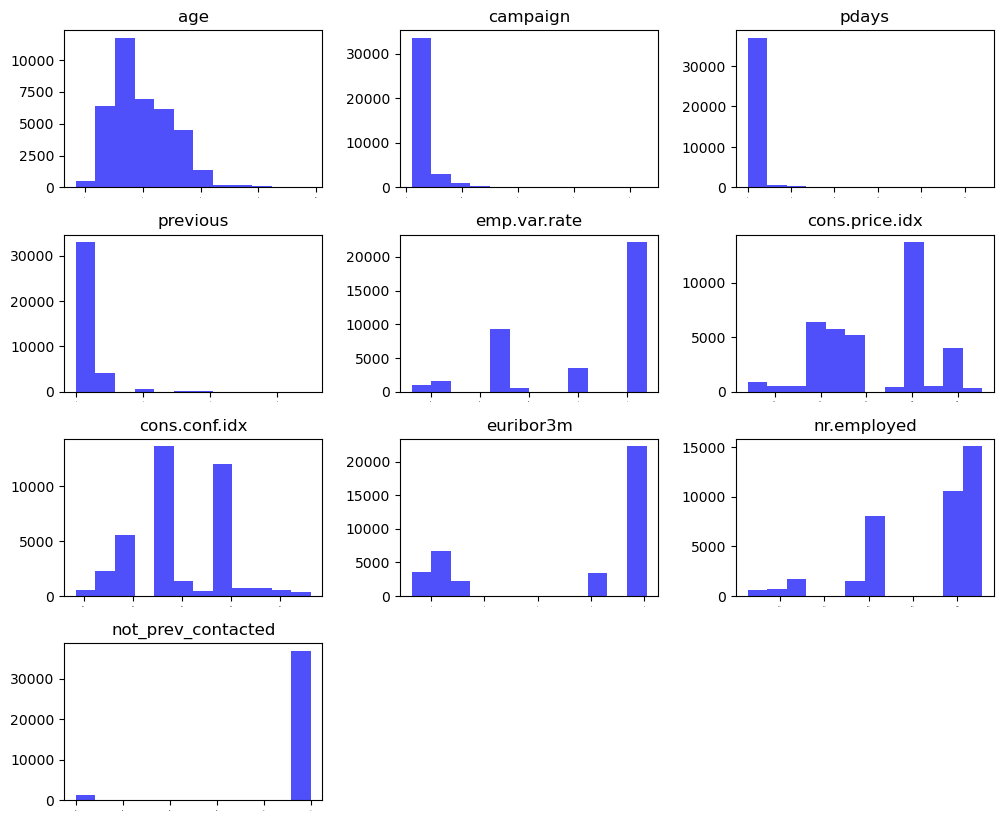

In [31]:
colors = palette=sns.light_palette('blue', 4)
df.hist(bins=12, grid=False, figsize=(12, 10), xlabelsize=0, color=colors[-2])
plt.show()

## Count plots for categorical features

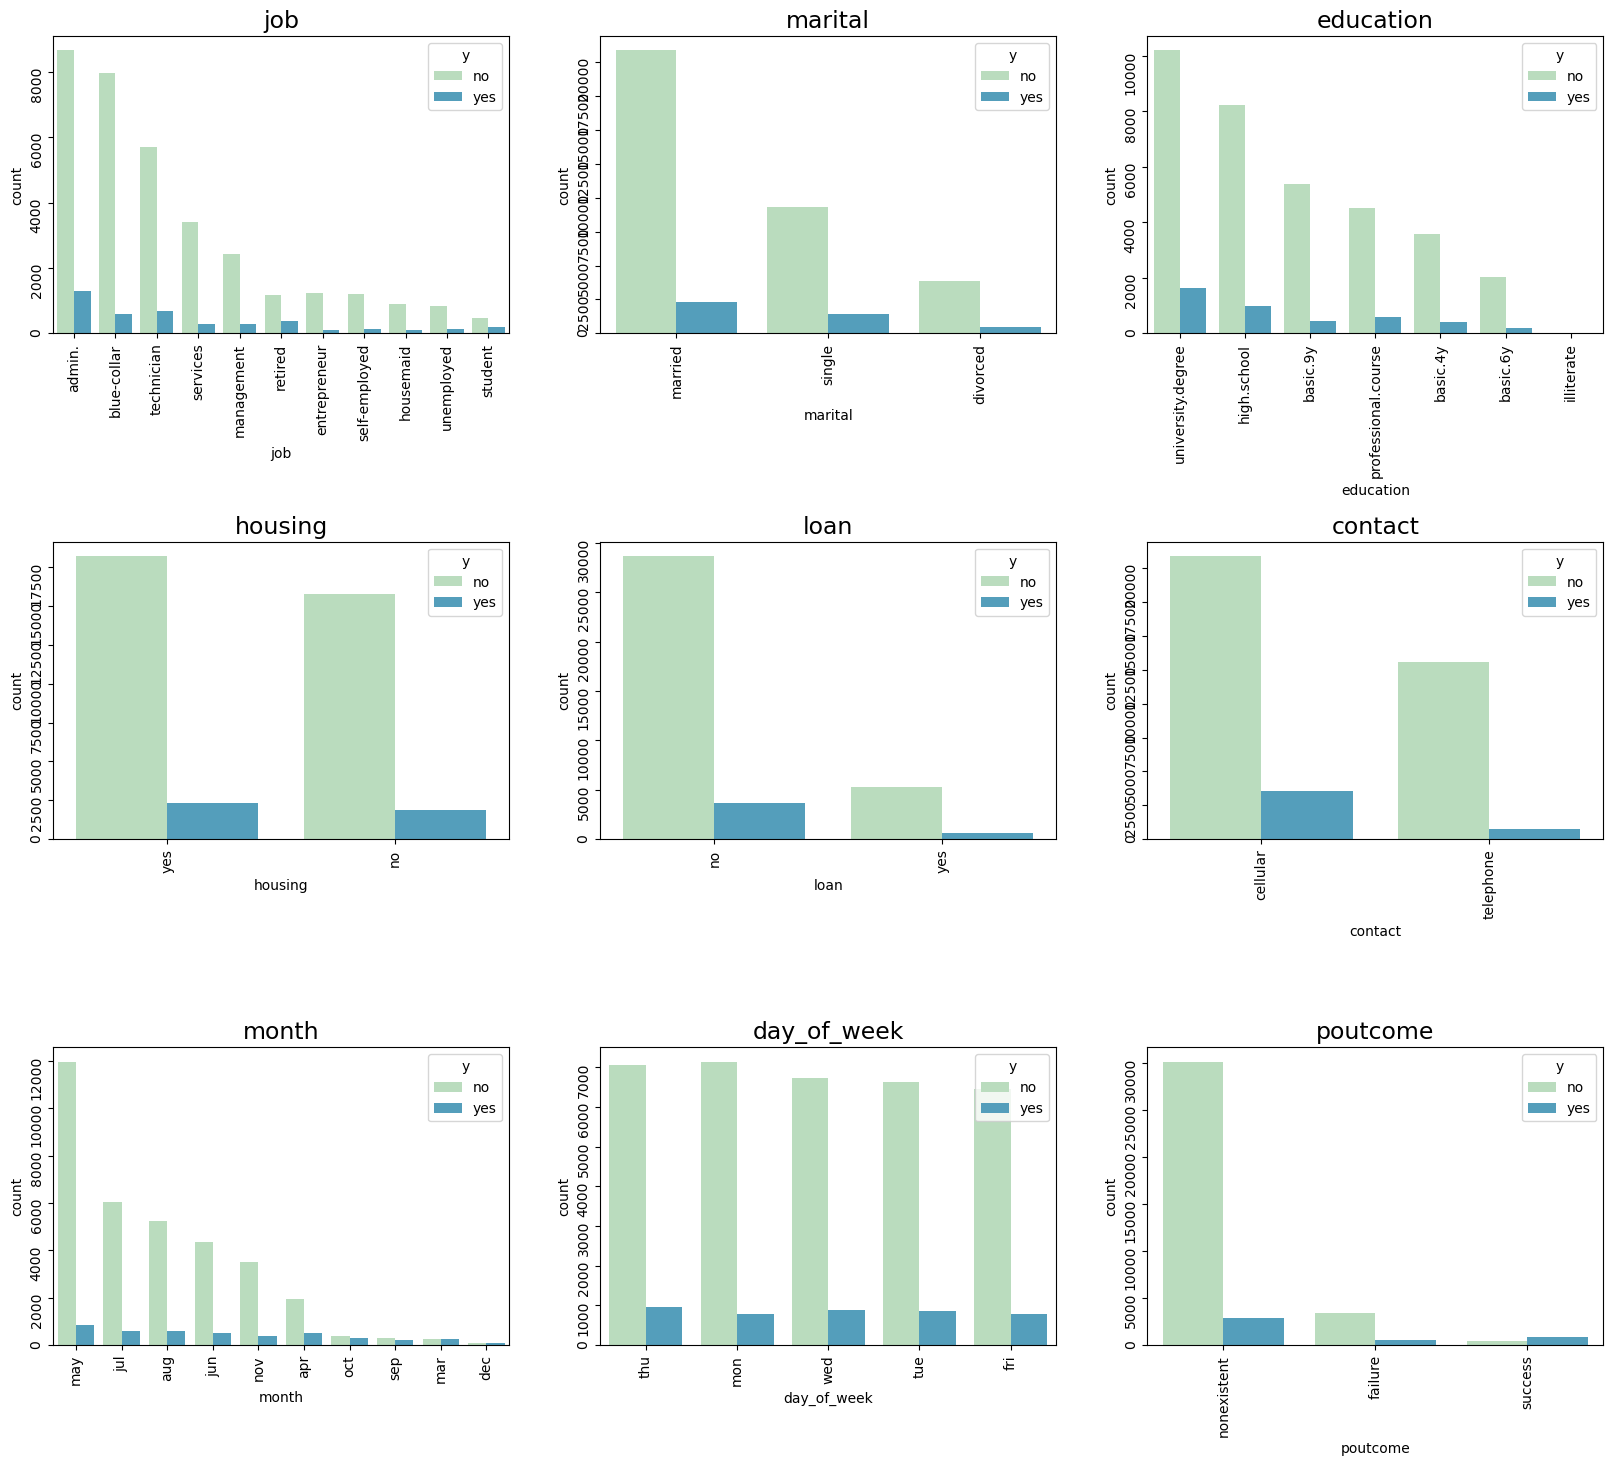

In [32]:
fig, ax = plt.subplots(3,3, figsize=(20,17))
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

In [8]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

middle.school          12062
university.degree      11821
high.school             9244
professional.course     5100
illiterate                18
Name: education, dtype: int64

In [9]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

## Correlation Matrix

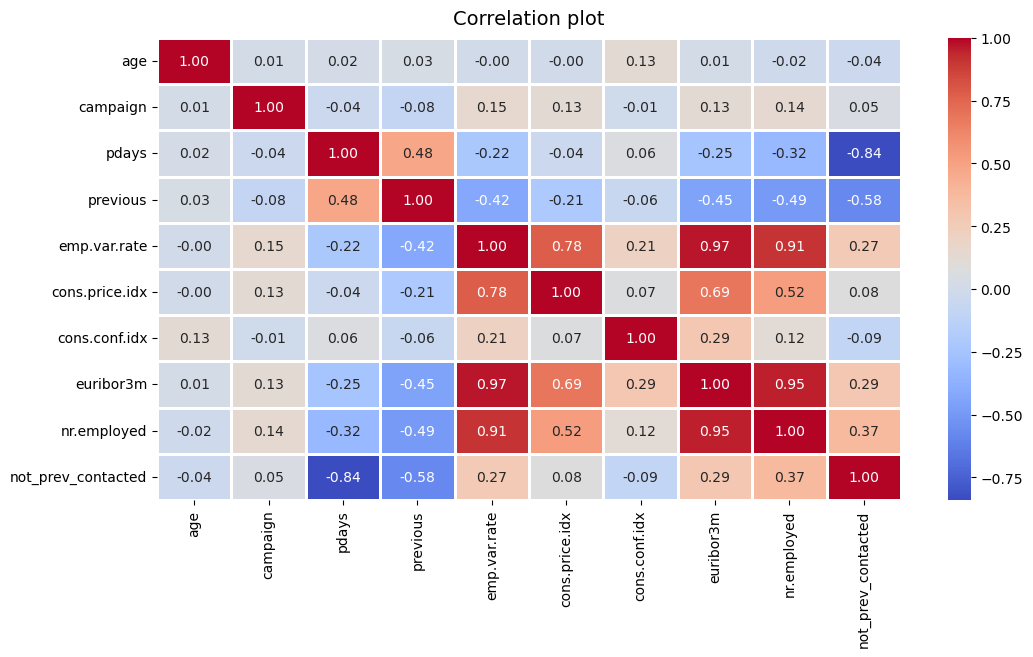

In [35]:
corr = df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(round(corr, 2), 
            annot=True, cmap='coolwarm', linewidths=1, fmt='.2f')
plt.title("Correlation plot", size=14, pad=10)
plt.show()

## Label and One-Hot encoding features

In [10]:
df.poutcome = df.poutcome.map({'nonexistent':-1, 'failure':0, 'success':1}).astype('uint8') 

In [11]:
df['job'] = df['job'].apply(lambda x: -1 if x=='unknown' else (0 if x=='unemployed' else 1))
df['housing'] = df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['loan'] = df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))

In [12]:
df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)

In [43]:
df.head()

,age,job,marital,education,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,not_prev_contacted
0,56,1,married,middle.school,0,0,1,0,0,255,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,1,married,high.school,0,0,1,0,0,255,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,1,married,high.school,1,0,1,0,0,255,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,1,married,middle.school,0,0,1,0,0,255,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,1,married,high.school,0,1,1,0,0,255,1.1,93.994,-36.4,4.857,5191.0,0,1


In [13]:
df  = pd.get_dummies(df, drop_first = True)

In [14]:
df = df.drop(df[df['y'] == 0].sample(frac=0.75).index)

In [15]:
X = df.drop("y", axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choice of Algorithm


In [35]:
#global perimeters for camparisions 
accuracies_df = pd.DataFrame(columns=['Algorithm', 'Accuracy'])
precision_df = pd.DataFrame(columns=['Algorithm', 'Precision'])
recall_df = pd.DataFrame(columns=['Algorithm', 'Recall'])
f1_df = pd.DataFrame(columns=['Algorithm', 'F1'])

## Data Scaling

In [17]:
scale = StandardScaler()
scaled_X = scale.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

## Splitting Dataset into Train and Test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.20, random_state = 42)

## K-Neighbors

### K-Neighbors base model

**************


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


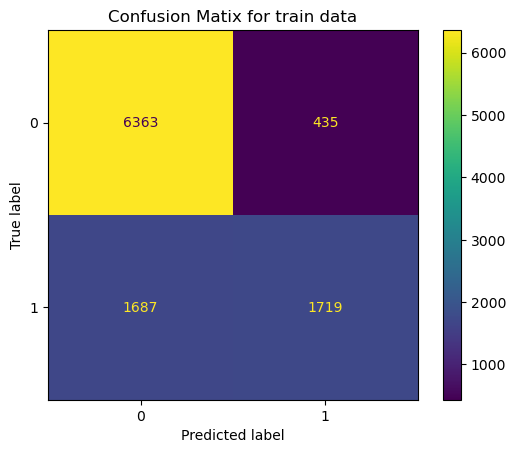


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


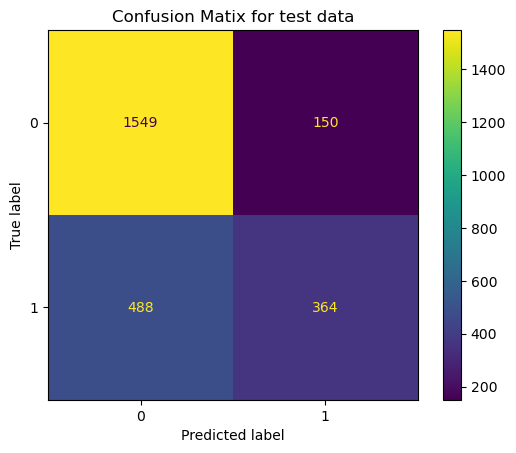


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      6798
           1       0.80      0.50      0.62      3406

    accuracy                           0.79     10204
   macro avg       0.79      0.72      0.74     10204
weighted avg       0.79      0.79      0.78     10204


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83      1699
           1       0.71      0.43      0.53       852

    accuracy                           0.75      2551
   macro avg       0.73      0.67      0.68      2551
weighted avg       0.74      0.75      0.73      2551


Ploting ROC Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


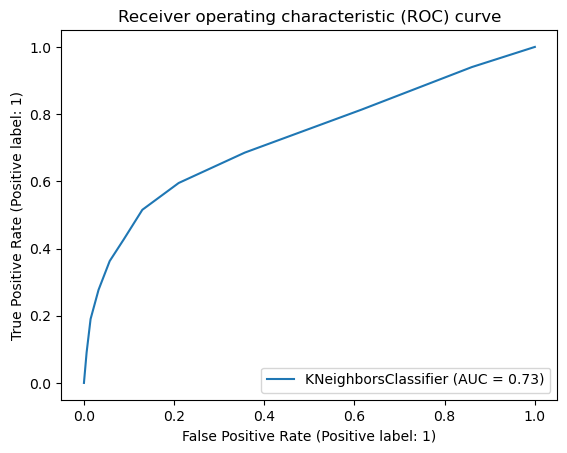


Ploting PR Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


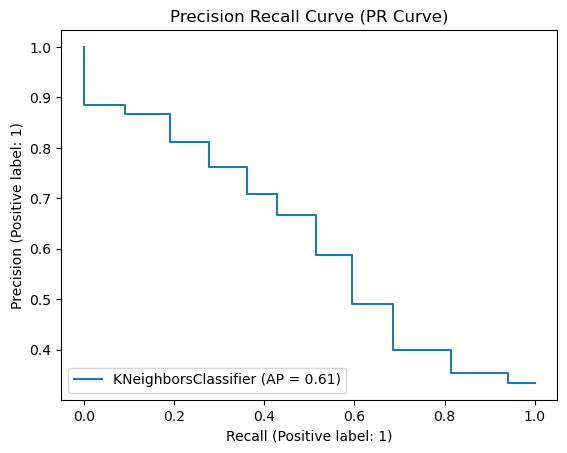

In [36]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit( X_train, y_train)

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

accuracy_test = accuracy_score(y_test,y_test_pred)
accuracy_train =  accuracy_score(y_train,y_train_pred)

roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')

f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred) 

newRow1 = {'Algorithm':'K-Neighbors', 'Accuracy': accuracy_test }
newRow2 = {'Algorithm':'K-Neighbors', 'Precision':precision }
newRow3 = {'Algorithm':'K-Neighbors', 'Recall': recall}
newRow4 = {'Algorithm':'K-Neighbors', 'F1-Score': f1}

accuracies_df = accuracies_df.append(newRow1, ignore_index=True)
precision_df = precision_df.append(newRow2, ignore_index=True)
recall_df = recall_df.append(newRow3, ignore_index=True)
f1_df = f1_df.append(newRow4, ignore_index=True)

print("**************\n")
print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(knn, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(knn, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()

print("Classification Report For Train Data: \n", classification_report(y_train, y_train_pred))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_test_pred))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(knn, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(knn, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()

### K-Neighbors hyperparamter tuning

In [84]:
error_rate = []
acc = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    acc.append(accuracy_score(y_test, pred_i))

Minimum error:- 0.22108976871814975 at K = 24


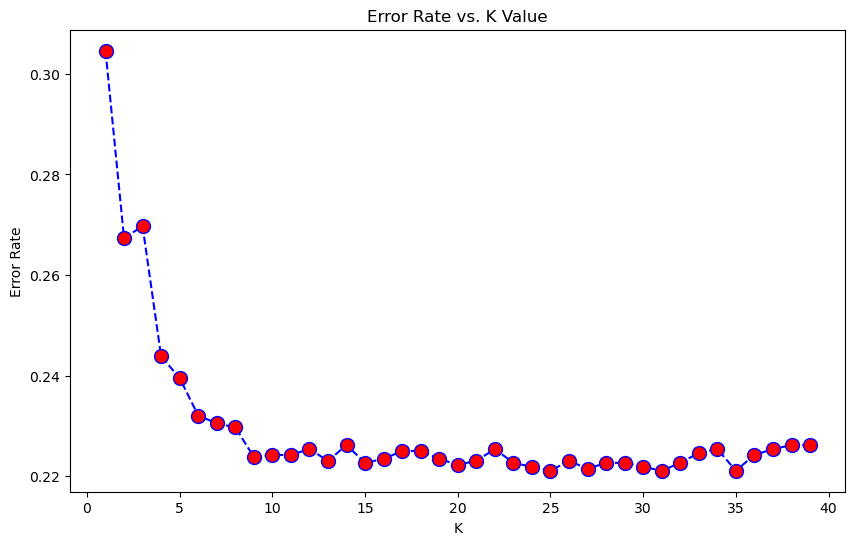

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7789102312818502 at K = 24


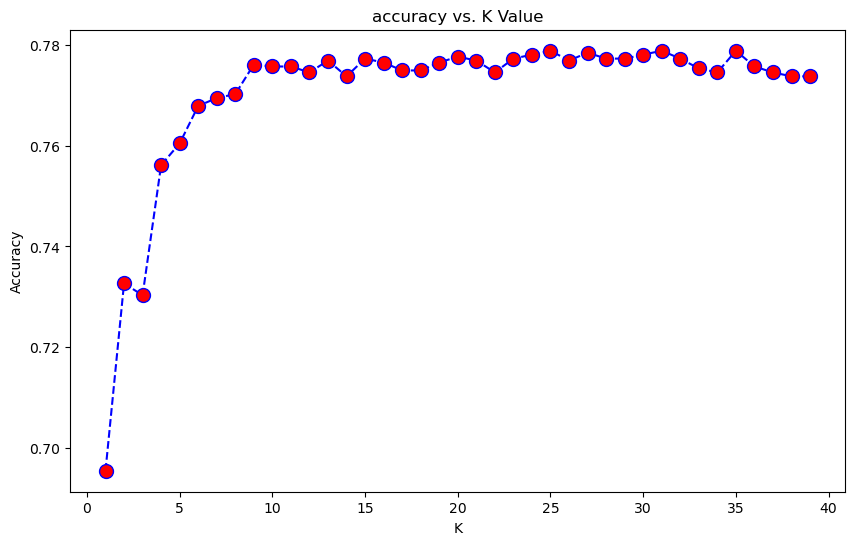

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

### K-neighbors tuned model

**************


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


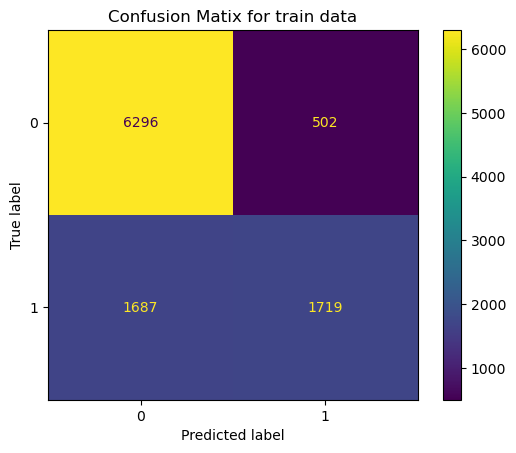


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


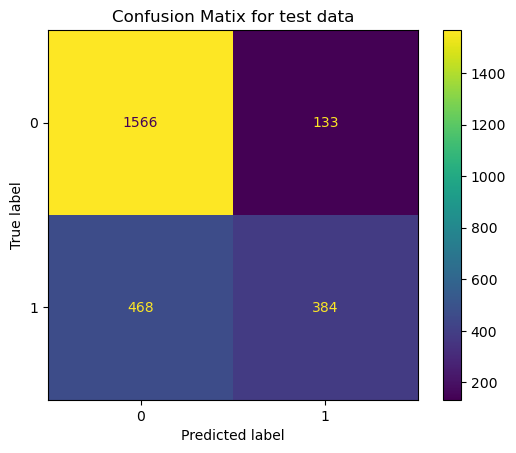


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      6798
           1       0.77      0.50      0.61      3406

    accuracy                           0.79     10204
   macro avg       0.78      0.72      0.73     10204
weighted avg       0.78      0.79      0.77     10204


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84      1699
           1       0.74      0.45      0.56       852

    accuracy                           0.76      2551
   macro avg       0.76      0.69      0.70      2551
weighted avg       0.76      0.76      0.75      2551


Ploting ROC Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


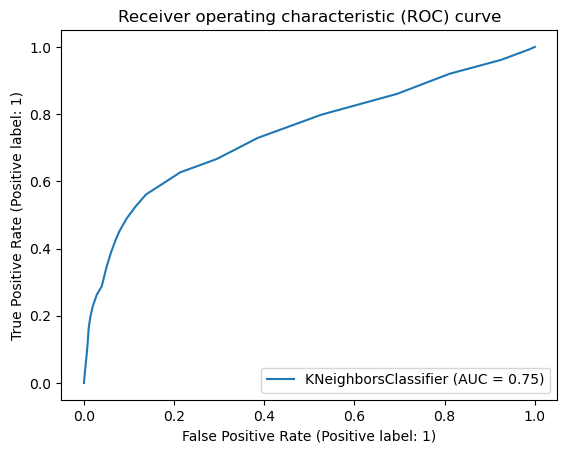


Ploting PR Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


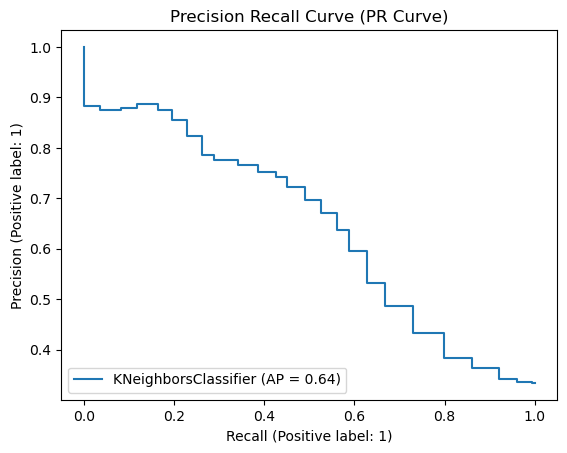

In [37]:
knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit( X_train, y_train)

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

accuracy_test = accuracy_score(y_test,y_test_pred)
accuracy_train =  accuracy_score(y_train,y_train_pred)

roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')

f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred) 

newRow1 = {'Algorithm':'K-Neighbors Tuned', 'Accuracy': accuracy_test }
newRow2 = {'Algorithm':'K-Neighbors Tuned', 'Precision':precision }
newRow3 = {'Algorithm':'K-Neighbors Tuned', 'Recall': recall}
newRow4 = {'Algorithm':'K-Neighbors Tuned', 'F1-Score': f1}

accuracies_df = accuracies_df.append(newRow1, ignore_index=True)
precision_df = precision_df.append(newRow2, ignore_index=True)
recall_df = recall_df.append(newRow3, ignore_index=True)
f1_df = f1_df.append(newRow4, ignore_index=True)

print("**************\n")
print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(knn, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(knn, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()

print("Classification Report For Train Data: \n", classification_report(y_train, y_train_pred))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_test_pred))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(knn, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(knn, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()

## Random Forest

### Random Forest base model

**************


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


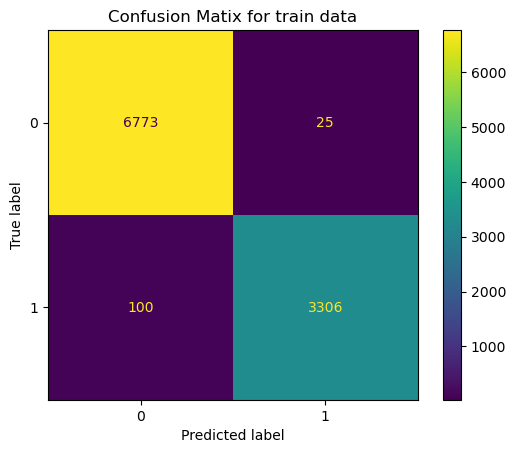


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


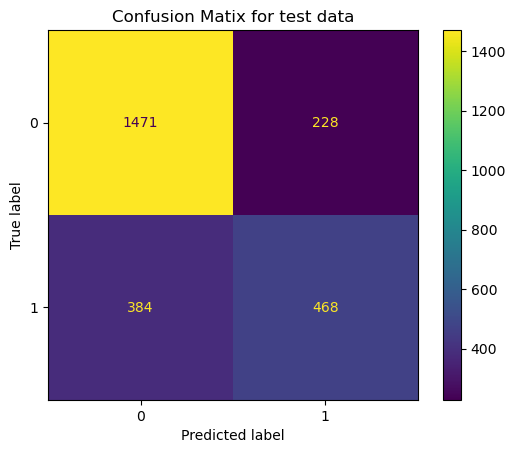


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6798
           1       0.99      0.97      0.98      3406

    accuracy                           0.99     10204
   macro avg       0.99      0.98      0.99     10204
weighted avg       0.99      0.99      0.99     10204


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1699
           1       0.67      0.55      0.60       852

    accuracy                           0.76      2551
   macro avg       0.73      0.71      0.72      2551
weighted avg       0.75      0.76      0.75      2551


Ploting ROC Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


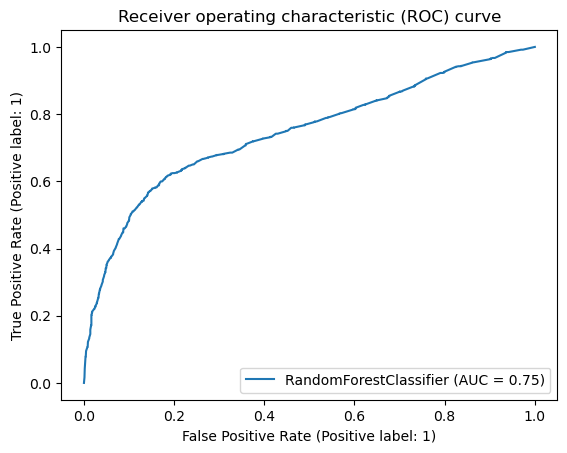

C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Ploting PR Curve for test data


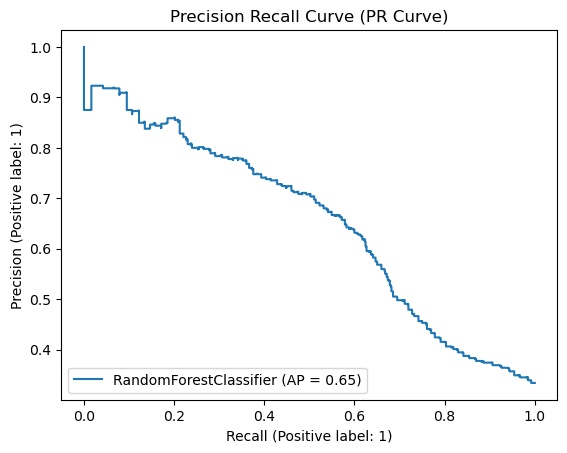

In [38]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

accuracy_test = accuracy_score(y_test,y_test_pred)
accuracy_train =  accuracy_score(y_train,y_train_pred)

roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')

f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred) 

newRow1 = {'Algorithm':'Random Forest', 'Accuracy': accuracy_test }
newRow2 = {'Algorithm':'Random Forest', 'Precision':precision }
newRow3 = {'Algorithm':'Random Forest', 'Recall': recall}
newRow4 = {'Algorithm':'Random Forest', 'F1-Score': f1}

accuracies_df = accuracies_df.append(newRow1, ignore_index=True)
precision_df = precision_df.append(newRow2, ignore_index=True)
recall_df = recall_df.append(newRow3, ignore_index=True)
f1_df = f1_df.append(newRow4, ignore_index=True)

print("**************\n")
print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(rf, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(rf, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()

print("Classification Report For Train Data: \n", classification_report(y_train, y_train_pred))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_test_pred))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(rf, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(rf, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()

### Random Forest hyperparameter tuning

In [90]:
model = RandomForestClassifier()
space = dict()
space = {
       'n_estimators': [100,200,400,600,800],
       'criterion': ['gini', 'entropy'],
       'max_depth': [2,4,6,8,10,12,16,20],
       'min_samples_split': [2,4,6,10,20,30],
        }

classifier = GridSearchCV(model,space, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
classifier.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % classifier.best_score_)
print('Best Hyperparameters: %s' % classifier.best_params_)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best Score: 0.7990986962313479
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 30, 'n_estimators': 400}


### Random Forest tuned model

**************


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


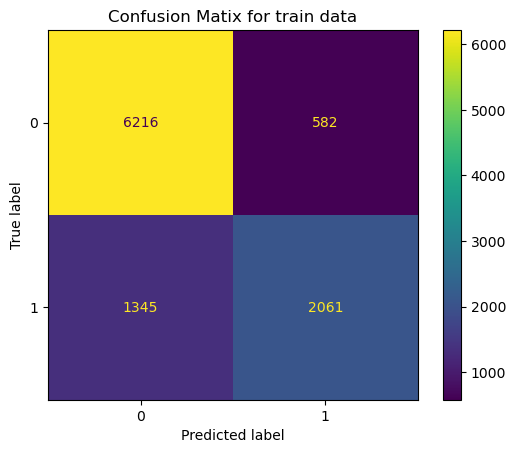


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


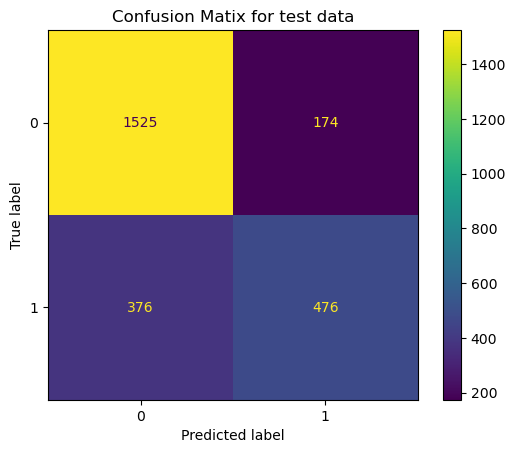


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      6798
           1       0.78      0.61      0.68      3406

    accuracy                           0.81     10204
   macro avg       0.80      0.76      0.77     10204
weighted avg       0.81      0.81      0.80     10204


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1699
           1       0.73      0.56      0.63       852

    accuracy                           0.78      2551
   macro avg       0.77      0.73      0.74      2551
weighted avg       0.78      0.78      0.78      2551


Ploting ROC Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


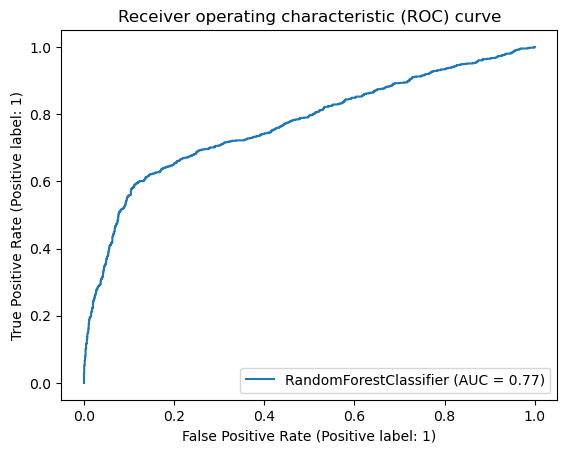


Ploting PR Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


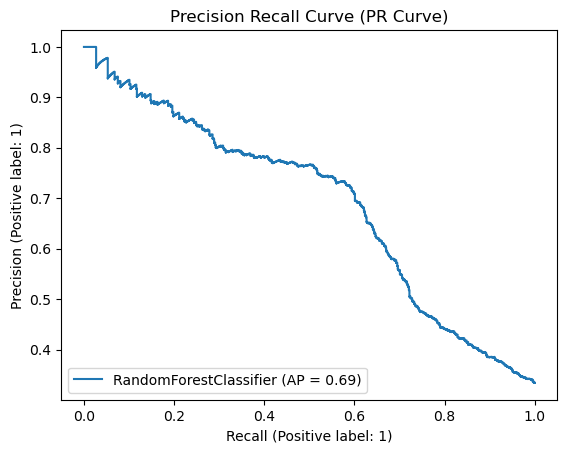

In [39]:
rf = RandomForestClassifier(criterion='gini', max_depth=20, min_samples_split=30, n_estimators=400, random_state=42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

accuracy_test = accuracy_score(y_test,y_test_pred)
accuracy_train =  accuracy_score(y_train,y_train_pred)

roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')

f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred) 

newRow1 = {'Algorithm':'Random Forest Tuned', 'Accuracy': accuracy_test }
newRow2 = {'Algorithm':'Random Forest Tuned', 'Precision':precision }
newRow3 = {'Algorithm':'Random Forest Tuned', 'Recall': recall}
newRow4 = {'Algorithm':'Random Forest Tuned', 'F1-Score': f1}

accuracies_df = accuracies_df.append(newRow1, ignore_index=True)
precision_df = precision_df.append(newRow2, ignore_index=True)
recall_df = recall_df.append(newRow3, ignore_index=True)
f1_df = f1_df.append(newRow4, ignore_index=True)

print("**************\n")
print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(rf, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(rf, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()

print("Classification Report For Train Data: \n", classification_report(y_train, y_train_pred))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_test_pred))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(rf, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(rf, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()

## Multi-Layer Perceptron

C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


**************


Plotting Confusion Matix for train data: 


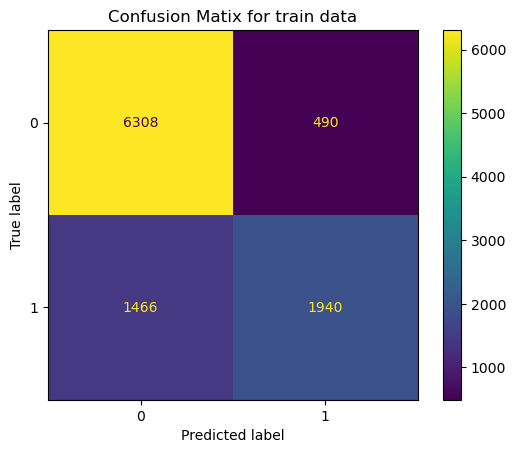


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


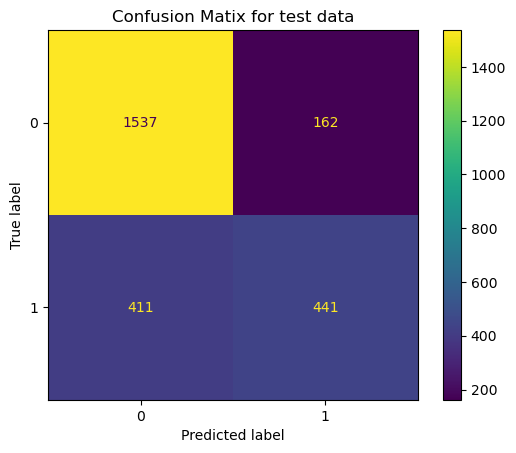


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      6798
           1       0.80      0.57      0.66      3406

    accuracy                           0.81     10204
   macro avg       0.80      0.75      0.77     10204
weighted avg       0.81      0.81      0.80     10204


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1699
           1       0.73      0.52      0.61       852

    accuracy                           0.78      2551
   macro avg       0.76      0.71      0.72      2551
weighted avg       0.77      0.78      0.76      2551


Ploting ROC Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


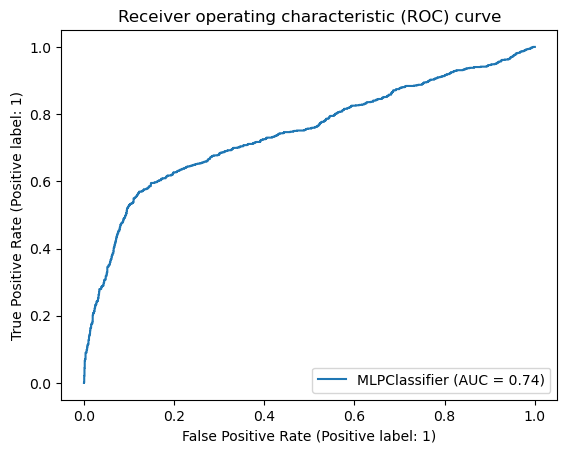


Ploting PR Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


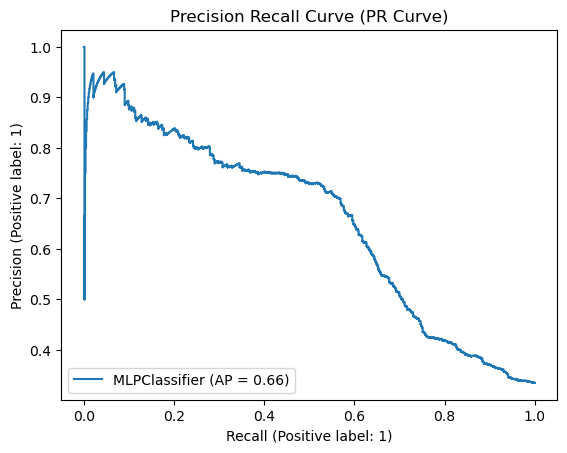

Text(0.5, 1.0, 'Training loss for MLP classifier')

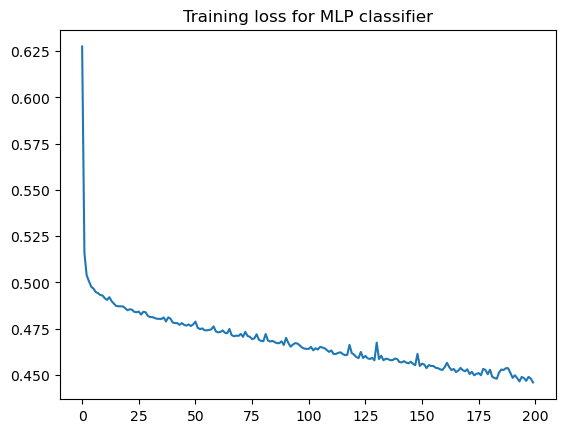

In [40]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

y_test_pred = mlp.predict(X_test)
y_train_pred = mlp.predict(X_train)

accuracy_test = accuracy_score(y_test,y_test_pred)
accuracy_train =  accuracy_score(y_train,y_train_pred)

roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')

f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred) 

newRow1 = {'Algorithm':'Multi-layer Perceptron', 'Accuracy': accuracy_test }
newRow2 = {'Algorithm':'Multi-layer Perceptron', 'Precision':precision }
newRow3 = {'Algorithm':'Multi-layer Perceptron', 'Recall': recall}
newRow4 = {'Algorithm':'Multi-layer Perceptron', 'F1-Score': f1}

accuracies_df = accuracies_df.append(newRow1, ignore_index=True)
precision_df = precision_df.append(newRow2, ignore_index=True)
recall_df = recall_df.append(newRow3, ignore_index=True)
f1_df = f1_df.append(newRow4, ignore_index=True)

print("**************\n")
print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(mlp, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(mlp, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()

print("Classification Report For Train Data: \n", classification_report(y_train, y_train_pred))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_test_pred))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(mlp, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(mlp, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()

#Training loss for MLP classifier
plt.plot(mlp.loss_curve_)
plt.title('Training loss for MLP classifier')

In [19]:
model = MLPClassifier()
space = dict()
space = {
       'hidden_layer_sizes': [(100), (100, 150), (100, 150, 100)],
       'activation': ['tanh', 'logistic', 'relu'],
       'solver': ['sgd', 'adam', 'lbfgs'],
       'tol': [0.0001,0.00001],
       'max_iter': [200, 500],
        }

classifier = GridSearchCV(model, space, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
classifier.fit(X_train.values, y_train.values)

# summarize result
print('Best Score: %s' % classifier.best_score_)
print('Best Hyperparameters: %s' % classifier.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Score: 0.7898861229907653
Best Hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (100, 150), 'max_iter': 200, 'solver': 'lbfgs', 'tol': 1e-05}


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


**************


Plotting Confusion Matix for train data: 


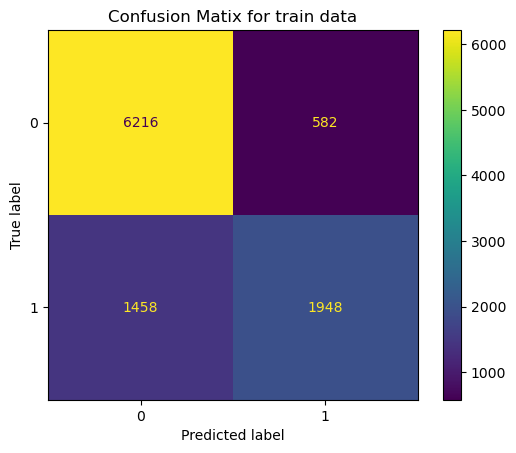


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


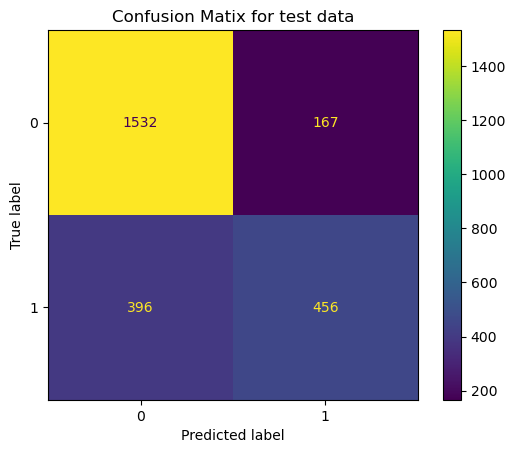


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      6798
           1       0.77      0.57      0.66      3406

    accuracy                           0.80     10204
   macro avg       0.79      0.74      0.76     10204
weighted avg       0.80      0.80      0.79     10204


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1699
           1       0.73      0.54      0.62       852

    accuracy                           0.78      2551
   macro avg       0.76      0.72      0.73      2551
weighted avg       0.77      0.78      0.77      2551


Ploting ROC Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


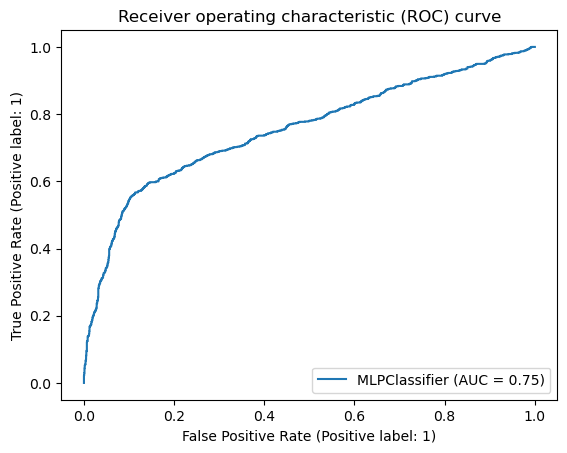


Ploting PR Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


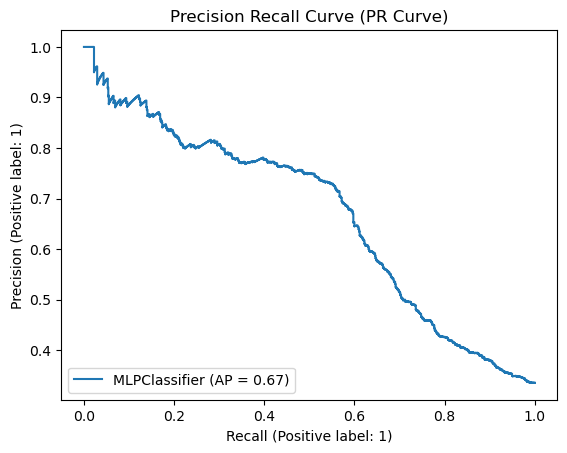

AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

In [41]:
mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 150), max_iter=200, solver='lbfgs', tol=1e-05, random_state=42)
mlp.fit(X_train, y_train)

y_test_pred = mlp.predict(X_test)
y_train_pred = mlp.predict(X_train)

accuracy_test = accuracy_score(y_test,y_test_pred)
accuracy_train =  accuracy_score(y_train,y_train_pred)

roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')

f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred) 

newRow1 = {'Algorithm':'Multi-layer Perceptron Tuned', 'Accuracy': accuracy_test }
newRow2 = {'Algorithm':'Multi-layer Perceptron Tuned', 'Precision':precision }
newRow3 = {'Algorithm':'Multi-layer Perceptron Tuned', 'Recall': recall}
newRow4 = {'Algorithm':'Multi-layer Perceptron Tuned', 'F1-Score': f1}

accuracies_df = accuracies_df.append(newRow1, ignore_index=True)
precision_df = precision_df.append(newRow2, ignore_index=True)
recall_df = recall_df.append(newRow3, ignore_index=True)
f1_df = f1_df.append(newRow4, ignore_index=True)

print("**************\n")
print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(mlp, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(mlp, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()

print("Classification Report For Train Data: \n", classification_report(y_train, y_train_pred))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_test_pred))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(mlp, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(mlp, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()

#Training loss for MLP classifier
plt.plot(mlp.loss_curve_)
plt.title('Training loss for MLP classifier')

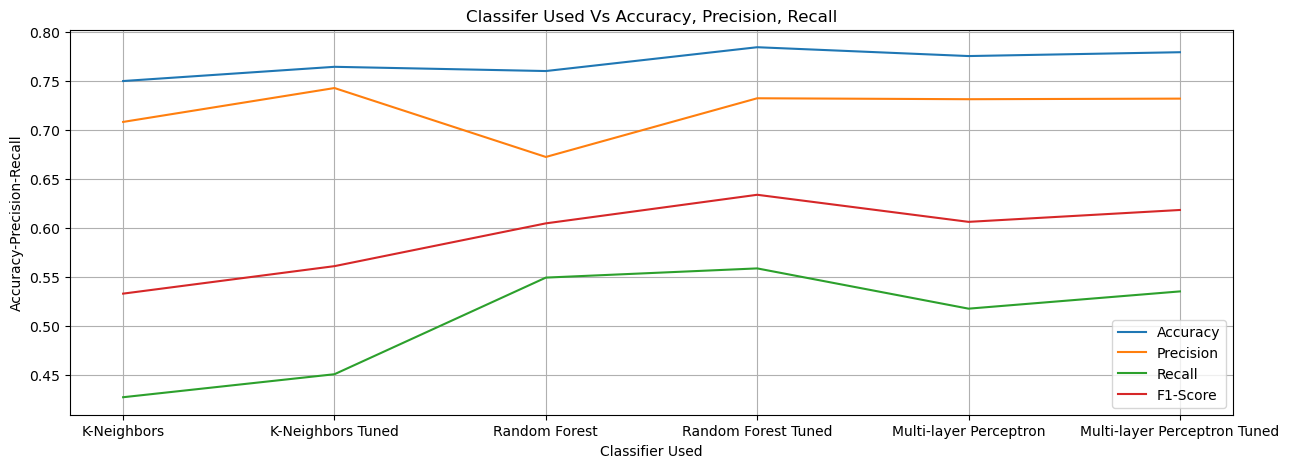

In [44]:
#plotting the accuracies vs classifier used 
plt.figure(figsize=(15,5))
plt.plot(accuracies_df['Algorithm'], accuracies_df['Accuracy'], label='Accuracy', color='tab:blue')
plt.plot(precision_df['Algorithm'], precision_df['Precision'], label='Precision',color='tab:orange')
plt.plot(recall_df['Algorithm'], recall_df['Recall'],label='Recall', color='tab:green')
plt.plot(f1_df['Algorithm'], f1_df['F1-Score'],label='F1-Score', color='tab:red')

plt.xlabel("Classifier Used")
plt.ylabel("Accuracy-Precision-Recall")
plt.title("Classifer Used Vs Accuracy, Precision, Recall")
plt.legend()
plt.grid()
plt.show()

In [47]:
result = pd.concat([accuracies_df['Algorithm'], accuracies_df['Accuracy'], recall_df['Recall'], precision_df['Precision'],
                 f1_df['F1-Score']],axis=1)
result

,Algorithm,Accuracy,Recall,Precision,F1-Score
0,K-Neighbors,0.749902,0.427230,0.708171,0.532943
1,K-Neighbors Tuned,0.764406,0.450704,0.742747,0.560993
2,Random Forest,0.760094,0.549296,0.672414,0.604651
3,Random Forest Tuned,0.784398,0.558685,0.732308,0.633822
4,Multi-layer Perceptron,0.775382,0.517606,0.731343,0.606186
5,Multi-layer Perceptron Tuned,0.779302,0.535211,0.731942,0.618305
